# Climate Change and Impacts in Africa

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.


## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

In [2]:
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# we need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')


# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
#Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('temperatures.csv')

## Data Validation


In [4]:
# Your code here (for the learner)
ipcc_2006_africa.info()
ipcc_2006_africa.rename(columns={'C_group_IM24_sh':'Region', 'Country_code_A3':'Code', 'ipcc_code_2006_for_standard_report_name': 'Industry'}, inplace=True)
ipcc_2006_africa.drop(['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance'], axis=1, inplace=True)
c = ipcc_2006_africa.columns.tolist()
c[5:] = range(1970,2022)
ipcc_2006_africa.columns = c
a = ipcc_2006_africa.columns[5:].tolist()
b = ipcc_2006_africa.columns[:5].tolist()
ipcc_2006_africa= pd.melt(ipcc_2006_africa, id_vars=b, var_name='Year', value_name='CO2', value_vars=a)
ipcc_2006_africa['Year']=ipcc_2006_africa['Year'].astype(int)
ipcc_2006_africa.info()
ipcc_2006_africa.dropna(inplace=True)
ipcc_2006_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1158 entries, 42 to 4772
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   IPCC_annex                               1158 non-null   object 
 1   C_group_IM24_sh                          1158 non-null   object 
 2   Country_code_A3                          1158 non-null   object 
 3   Name                                     1158 non-null   object 
 4   ipcc_code_2006_for_standard_report       1158 non-null   object 
 5   ipcc_code_2006_for_standard_report_name  1158 non-null   object 
 6   Substance                                1158 non-null   object 
 7   fossil_bio                               1158 non-null   object 
 8   Y_1970                                   822 non-null    float64
 9   Y_1971                                   825 non-null    float64
 10  Y_1972                                   826 non-nul

C:\Users\HP\AppData\Local\Temp\ipykernel_13112\4167590573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipcc_2006_africa.rename(columns={'C_group_IM24_sh':'Region', 'Country_code_A3':'Code', 'ipcc_code_2006_for_standard_report_name': 'Industry'}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13112\4167590573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipcc_2006_africa.drop(['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance'], axis=1, inplace=True)


In [5]:
totals_by_country_africa.info()
totals_by_country_africa.rename(columns={'C_group_IM24_sh':'Region', 'Country_code_A3':'Code'}, inplace=True)
totals_by_country_africa.drop(['IPCC_annex', 'Substance'], axis=1, inplace=True)
totals_by_country_africa.info()
c = totals_by_country_africa.columns.tolist()
c[3:] = range(1970,2022)
totals_by_country_africa.columns = c
a = totals_by_country_africa.columns[3:].tolist()
b = totals_by_country_africa.columns[:3].tolist()
totals_by_country_africa= pd.melt(totals_by_country_africa, id_vars=b, var_name='Year', value_name='CO2', value_vars=a)
totals_by_country_africa['Year']=totals_by_country_africa['Year'].astype(int)
totals_by_country_africa.info()
totals_by_country_africa.dropna(inplace=True)
totals_by_country_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 2 to 209
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IPCC_annex       56 non-null     object 
 1   C_group_IM24_sh  56 non-null     object 
 2   Country_code_A3  56 non-null     object 
 3   Name             56 non-null     object 
 4   Substance        56 non-null     object 
 5   Y_1970           56 non-null     float64
 6   Y_1971           56 non-null     float64
 7   Y_1972           56 non-null     float64
 8   Y_1973           56 non-null     float64
 9   Y_1974           56 non-null     float64
 10  Y_1975           56 non-null     float64
 11  Y_1976           56 non-null     float64
 12  Y_1977           56 non-null     float64
 13  Y_1978           56 non-null     float64
 14  Y_1979           56 non-null     float64
 15  Y_1980           56 non-null     float64
 16  Y_1981           56 non-null     float64
 17  Y_1982           56 no

C:\Users\HP\AppData\Local\Temp\ipykernel_13112\483180693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totals_by_country_africa.rename(columns={'C_group_IM24_sh':'Region', 'Country_code_A3':'Code'}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13112\483180693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totals_by_country_africa.drop(['IPCC_annex', 'Substance'], axis=1, inplace=True)


## Trend levels of 'CO2' across Africa

C:\Users\HP\AppData\Local\Temp\ipykernel_13112\3503499350.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=totals_by_country_africa, x="Year", y="CO2", hue="Region", ci=None).set(title='CO2 Trends accross Africa')


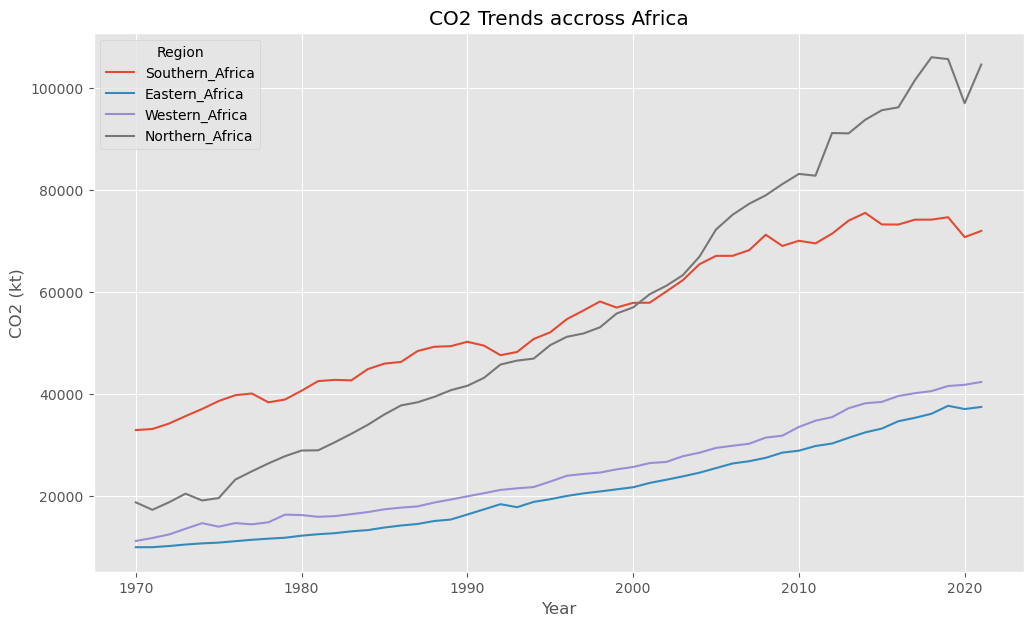

In [56]:
# Your code here
fig, axes = plt.subplots(figsize=(12, 7))
sns.lineplot(data=totals_by_country_africa, x="Year", y="CO2", hue="Region", ci=None).set(title='CO2 Trends accross Africa')
plt.xlabel("Year")
plt.ylabel("CO2 (kt)")
plt.show()


## Relationship between time (`Year`) and `CO2` levels across the African regions



In [25]:
# Your code here
relationship_btw_time_CO2=totals_by_country_africa.groupby('Region')[['Year', 'CO2']].corr(method='spearman').transpose()
relationship_btw_time_CO2 = relationship_btw_time_CO2.loc[relationship_btw_time_CO2.index=='CO2', :]

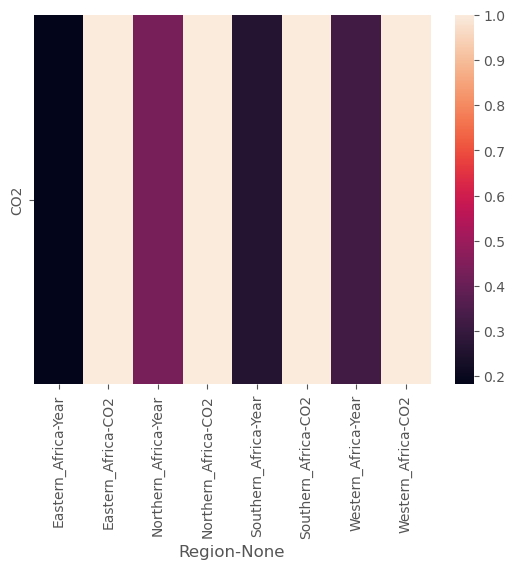

In [26]:
sns.heatmap(relationship_btw_time_CO2)
plt.show()

## Determine if there is a significant difference in the CO2 levels among the African Regions


In [27]:
# Your code here
aov_results = pingouin.anova(data=totals_by_country_africa, dv='CO2', between='Region')
pw_ttest_result = pingouin.pairwise_tests(data=totals_by_country_africa, dv='CO2', between='Region', padjust='bonf')

In [28]:
pw_ttest_result

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Region,Eastern_Africa,Northern_Africa,False,True,-9.435557,388.384101,two-sided,3.637966e-19,2.182780e-18,bonf,1.554e+17,-0.801390
1,Region,Eastern_Africa,Southern_Africa,False,True,-6.814718,641.441785,two-sided,2.180575e-11,1.308345e-10,bonf,4.024e+08,-0.421846
2,Region,Eastern_Africa,Western_Africa,False,True,-1.556846,1917.149304,two-sided,1.196721e-01,7.180324e-01,bonf,0.173,-0.059094
3,Region,Northern_Africa,Southern_Africa,False,True,0.080513,881.040358,two-sided,9.358475e-01,1.000000e+00,bonf,0.079,0.004785
4,Region,Northern_Africa,Western_Africa,False,True,7.588964,567.964972,two-sided,1.328970e-13,7.973818e-13,bonf,9.641e+10,0.418029
5,Region,Southern_Africa,Western_Africa,False,True,5.720995,795.803852,two-sided,1.499036e-08,8.994214e-08,bonf,5.437e+05,0.335300


## The most common (top 5) industries in each African region.



In [29]:
gs = ipcc_2006_africa.groupby(['Region', 'Industry']).size().reset_index(name='Count')
gs = gs.sort_values(by=['Region', 'Count'], ascending=[True, False])
top_5_industries = gs.groupby('Region').head(5).reset_index(drop=True)

In [30]:
top_5_industries

,Region,Industry,Count
0,Eastern_Africa,Residential and other sectors,1454
1,Eastern_Africa,Manufacturing Industries and Construction,1383
2,Eastern_Africa,Main Activity Electricity and Heat Production,1174
3,Eastern_Africa,Road Transportation no resuspension,742
4,Eastern_Africa,Glass Production,728
5,Northern_Africa,Residential and other sectors,572
6,Northern_Africa,Manufacturing Industries and Construction,456
7,Northern_Africa,Main Activity Electricity and Heat Production,315
8,Northern_Africa,Glass Production,312
9,Northern_Africa,Non-Energy Products from Fuels and Solvent Use,312


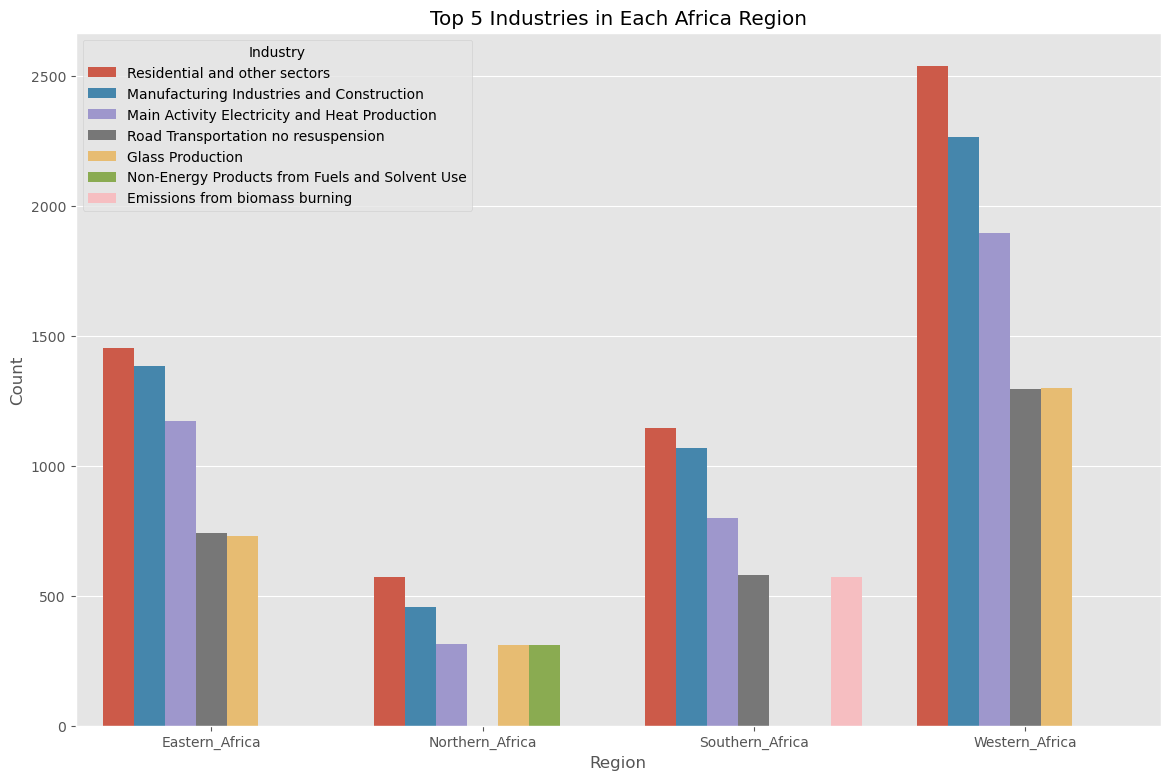

In [37]:
fig, axes = plt.subplots(figsize=(14, 9))
sns.barplot(data=top_5_industries, x='Region', y='Count', hue='Industry').set(title='Top 5 Industries in Each Africa Region')
plt.show()

## The industry responsible for the most amount of CO2 (on average) in each African Region



In [41]:
# Your code here
gs = ipcc_2006_africa.groupby(['Region','Industry'])[['CO2']].mean().reset_index()
gs = gs.sort_values(by=['Region', 'CO2'], ascending=[True, False])
max_co2_industries = gs.groupby('Region').head(1)
max_co2_industries

,Region,Industry,CO2
18,Eastern_Africa,Residential and other sectors,7904.439282
31,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
54,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
87,Western_Africa,Residential and other sectors,8702.936136


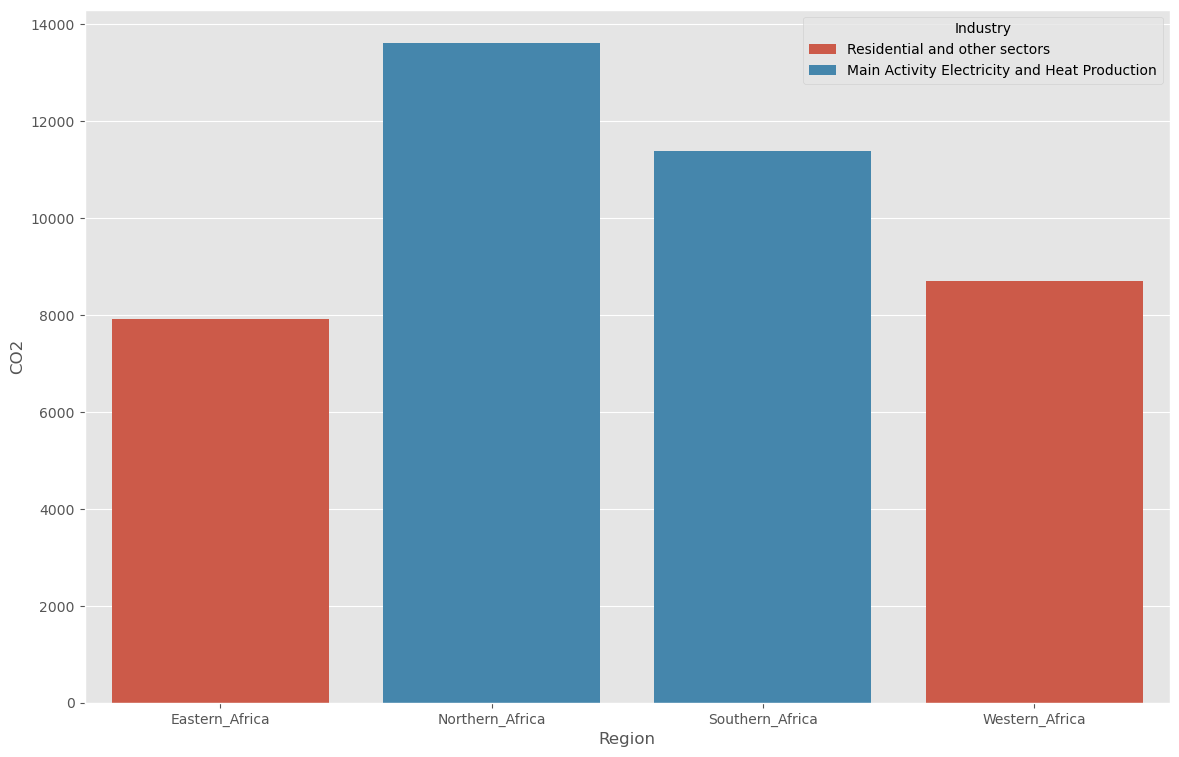

In [43]:
fig, axes = plt.subplots(figsize=(14, 9))
sns.barplot(data=max_co2_industries, x='Region', y='CO2', hue='Industry')
plt.show()

## Predict the `CO2` levels (at each African region) in the year 2025



In [45]:
# Your code here
reg = LinearRegression()
x = np.log10(totals_by_country_africa['CO2'])
y = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])
reg.fit(y,x)
# data provided for you
newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata = pd.get_dummies(newdata)
predicted_co2 = reg.predict(newdata)
predicted_co2 = np.round(10**predicted_co2, 2)
predicted_co2

array([15177.72, 10788.07, 37761.69, 41081.9 ])

In [46]:
target = np.log10(totals_by_country_africa['CO2'])
feats = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])
reg.fit(feats, target)
predicted_co2 = reg.predict(newdata)
predicted_co2 = np.round(10**predicted_co2, 2)
predicted_co2

array([15177.72, 10788.07, 37761.69, 41081.9 ])

## Determine if CO2 levels correlates with the annual temperature in the selected African countries


In [47]:
temperatures

,Year,Ethiopia,Mozambique,Nigeria,Tunisia
0,1960,22.59,23.82,26.87,19.78
1,1961,22.30,24.00,26.28,19.67
2,1962,22.36,23.77,26.68,19.37
3,1963,22.56,23.27,27.02,19.33
4,1964,22.15,23.47,26.66,19.41
...,...,...,...,...,...
57,2017,23.65,24.43,27.46,20.72
58,2018,23.27,24.56,27.41,20.72
59,2019,23.41,24.81,27.29,20.73
60,2020,23.38,24.61,27.43,20.87


In [48]:
# Your code here
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

selected_countries = totals_by_country_africa[totals_by_country_africa['Name'].isin(countries)][['Name','Year','CO2']]

temp_long = pd.melt(temperatures, id_vars='Year', var_name='Name', value_name='Temperature', value_vars=countries)

joined = pd.merge(selected_countries, temp_long, on=['Name', 'Year'], how='inner')

# Provided for you
# Uncomment and run to complete this task
model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          1.22e-182
Time:                        23:19:14   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

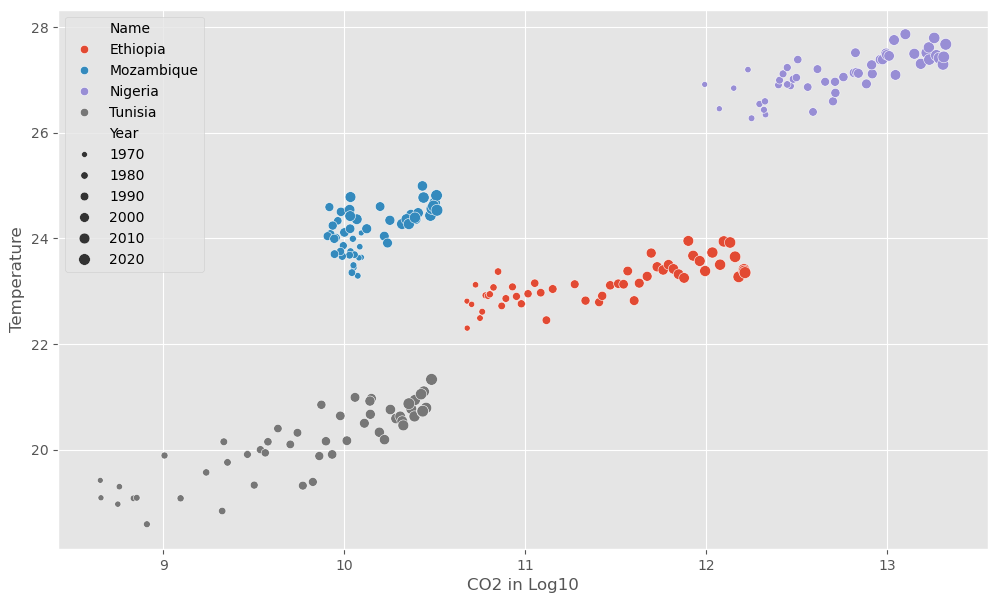

In [54]:
fig, axes = plt.subplots(figsize=(12, 7))
joined['CO2 in Log10'] = np.log(joined['CO2'])
sns.scatterplot(data=joined, x='CO2 in Log10', y='Temperature', hue='Name', size='Year')
plt.show()